# <img style="float: left; padding-right: 10px; width: 45px" src="https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/iacs.png"> CS109B Data Science 2: Advanced Topics in Data Science 
## Lab 11: RL

**Harvard University**<br>
**Fall 2020**<br>
**Instructors:** Mark Glickman, Pavlos Protopapas, and Chris Tanner<br>
**Lab Instructors:** Chris Tanner and Eleni Angelaki Kaxiras<br>
**Content:** Srivatsan Srinivasan, Pavlos Protopapas, Chris Tanner 


<hr style="height:2pt">

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import gym
%matplotlib inline 

## Reinforcement Learning with Open AI Gym

In this lab we are going to work with OpenAIgym's FrozenLake environment. The details of the environment can be found in the link https://gym.openai.com/envs/FrozenLake-v0/. 

Please visit http://gym.openai.com/docs/ for full documentation!


Winter is here. You and your friends were tossing around a frisbee at the park when you made a wild throw that left the frisbee out in the middle of the lake. The water is mostly frozen, but there are a few holes where the ice has melted. If you step into one of those holes, you'll fall into the freezing water. At this time, there's an international frisbee shortage, so it's absolutely imperative that you navigate across the lake and retrieve the disc. 

The agent controls the movement of a character in a grid world. Some tiles of the grid are walkable, and others lead to the agent falling into the water. Additionally, the movement direction of the agent is uncertain and only partially depends on the chosen direction. The agent is rewarded for finding a walkable path to a goal tile.

The surface is described using a grid like the following:

- S: starting point, safe
- F: frozen surface, safe
- H: hole, fall to your doom
- G: goal, where the frisbee is located

SFFF  <br> 
FHFH <br> 
FFFH  <br> 
HFFG <br> 

Expected actions are Left(0), Right(1), Down(2), Up(3). 

The episode ends when you reach the goal or fall in a hole. You receive a reward of 1 if you reach the goal, and zero otherwise.


In [2]:

from gym.envs.registration import register
register(id='FrozenLakeNotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196, # optimum = .8196
)

In [3]:
from gym.envs.registration import register
register(
    id='FrozenLake8x8NotSlippery-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '8x8', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.8196, # optimum = .8196
)

*hint:* If you receive an error message while registering the above env the second time you run this cell again, ignore the error message or restart the kernel. 

Throughout the assignment, use only the environments we registered in the previous cells:
- `FrozenLake8x8NotSlippery-v0`
- `FrozenLakeNotSlippery-v0` 

Even though the original problem description has slippery environment, we are working in a non-slippery environment. In our environment, if you go right, you only go right whereas in the original environment, if you intend to go right, you can go right, up or down with 1/3 probability.



In [4]:
#Change environment to FrozenLake8x8 to see grid.
env = gym.make('FrozenLake-v0')
# env = gym.make('FrozenLake8x8NotSlippery-v0')

print(env.observation_space.n)

#Both the grids look like as follows.
'''
    "4x4": [
        "SFFF",
        "FHFH",
        "FFFH",
        "HFFG"
    ],
    "8x8": [
        "SFFFFFFF",
        "FFFFFFFF",
        "FFFHFFFF",
        "FFFFFHFF",
        "FFFHFFFF",
        "FHHFFFHF",
        "FHFFHFHF",
        "FFFHFFFG"
    ]'''

#env.render() prints the frozenlake with an indicator showing where the agent is. You can use it for debugging.
env.render()

16

SFFF
FHFH
FFFH
HFFG


In [5]:
print(env.observation_space.n)
print(env.action_space.n)

16
4


In [6]:
Q = np.zeros([env.observation_space.n,env.action_space.n])

def choose_action(state):
    action=0
    if np.random.uniform(0, 1) < epsilon:
        action = env.action_space.sample()
    else:
        action = np.argmax(Q[state, :])
    return action

def learn(s, s1, r, a):
    predict = Q[s, a]
    target = r + gamma * np.max(Q[s1, :])
    Q[s, a] = Q[s, a] + lr_rate * (target - predict)

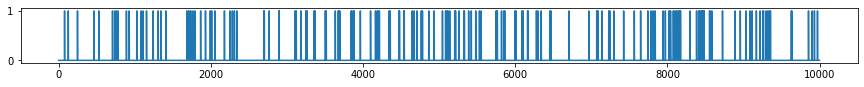

In [24]:
# Set learning parameters
################

num_episodes = 10000
epsilon = 0.6
max_steps = 12
lr_rate = 0.7
gamma = 0.95

#num_episodes = 10
max_iter_per_episode = 20
li_sum_rewards = []
for i in range(num_episodes):
    iter = 0
            
    #Reset environment and get an initial state - should be done at start of each episode.
    s = env.reset()
    d = False
    j = 0
    sum_rewards = 0 # listed as G in the book
    while iter < max_iter_per_episode:
        iter+=1
        #Choose an action
        a = choose_action(s)
        # env.step() gives you next state, reward, done(whether the episode is over)
        # s1 - new state, r-reward, d-whether you are done or not
        s1,r,d,_ = env.step(a)
        sum_rewards += r
        
        #print('State : ',s, ' Action : ', a, ' State 1 : ', s1, ' Reward : ',r, 'Done : ', d)
        
        learn(s, s1, r, a)
        
        #if abs(r) > 0:
        #    print("r:", r)
            #assert False
        if iter > max_steps:
            d = True
            
        if d:
            li_sum_rewards.append(sum_rewards)
            #print('Episode Over')
            #if r != 1:
            #    print('Fell into hole with reward ', r)            
            break
        s = s1
plt.figure(figsize=(15,1))
plt.plot(li_sum_rewards)
plt.show()